In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [3]:
df = pd.read_pickle('kickstarter_analysis.pkl')

In [3]:
df.head(2)

,blurb,country,created_at,currency,deadline,launched_at,slug,spotlight,staff_pick,state,...,usd_goal,percent_goal,vid_usage,reach_goal,usd_rewards,description_len,blurb_len,slug_len,med_rewards,reward_len
0,Ginger KICK! is back for the holidays with ama...,US,2017-11-05 12:05:03,USD,2017-11-12 20:33:24,2017-11-05 20:33:24,ginger-kick-holiday-cheer,True,False,successful,...,50.0,1650.00,False,True,"[1.0, 6.0, 12.0, 30.0, 50.0, 100.0]",4138.0,127.0,25,21.0,6
1,Let's go to the movies on the L.A. River! Help...,US,2013-02-26 21:38:16,USD,2013-04-11 17:20:16,2013-03-12 17:20:16,la-river-bike-in-movie-theater,True,True,successful,...,10000.0,105.45,False,True,"[10.0, 25.0, 50.0, 100.0, 250.0]",1812.0,133.0,30,50.0,5


In [4]:
df.columns

Index(['blurb', 'country', 'created_at', 'currency', 'deadline', 'launched_at',
       'slug', 'spotlight', 'staff_pick', 'state', 'usd_pledged',
       'category_name', 'location_displayable_name', 'location_country',
       'location_state', 'web_url', 'description', 'img_count', 'vid_count',
       'category_core', 'usd_goal', 'percent_goal', 'vid_usage', 'reach_goal',
       'usd_rewards', 'description_len', 'blurb_len', 'slug_len',
       'med_rewards', 'reward_len'],
      dtype='object')

In [64]:
reached_goal = df[df.reach_goal == True]
missed_goal = df[df.reach_goal == False]

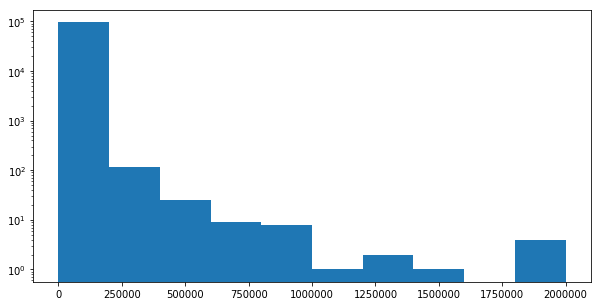

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = plt.hist(reached_goal.usd_goal)
ax = plt.semilogy()
plt.show()

In [65]:
usd_reached_goal = reached_goal[(reached_goal.usd_goal <= 1000000) & (reached_goal.usd_goal >= 1000)].usd_goal
usd_missed_goal = missed_goal[(missed_goal.usd_goal <= 1000000) & (missed_goal.usd_goal >= 1000)].usd_goal

In [66]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## Bootstrap Mean of USD Goal by Success

In [67]:
N_rep = 10000
bs_reach_usd = draw_bs_reps(usd_reached_goal, np.mean, N_rep)
bs_reach_low, bs_reach_high = np.percentile(bs_reach_usd, [2.5, 97.5])     
print(bs_reach_low, bs_reach_high)


bs_miss_usd = draw_bs_reps(usd_missed_goal, np.mean, N_rep)
bs_miss_low, bs_miss_high = np.percentile(bs_miss_usd, [2.5, 97.5])
print(bs_miss_low, bs_miss_high)

11143.494201873154 11501.16832592962
31245.71380655574 32506.573691552912


In [68]:
obs_reach_usd = np.mean(usd_reached_goal)
obs_missed_usd = np.mean(usd_missed_goal)

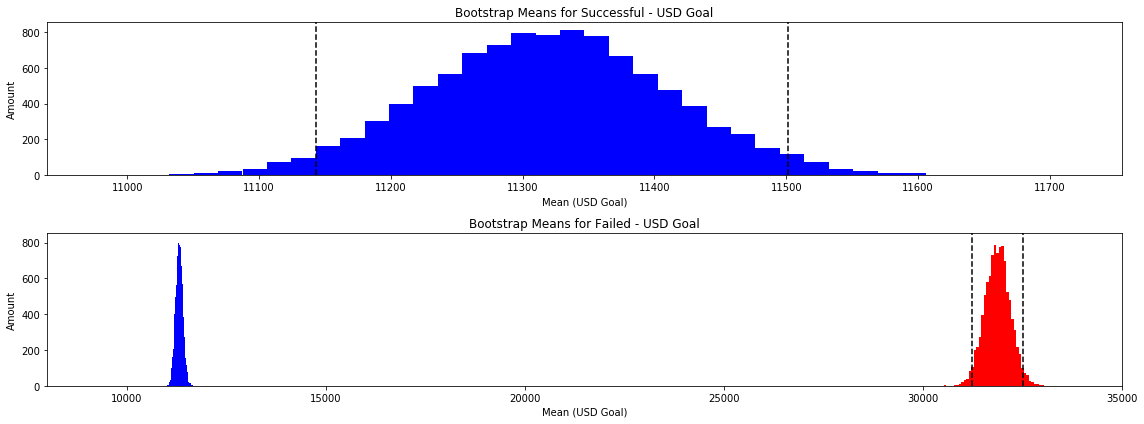

In [70]:
fig, ax = plt.subplots(2, 1, figsize = (16, 6))
bins = 40

ax = plt.subplot(2,1,1)
ax = plt.hist(bs_reach_usd, color = 'b', bins = bins)
plt.axvline(bs_reach_low, color = 'k', linestyle = '--')
plt.axvline(bs_reach_high, color = 'k', linestyle = '--')
plt.xlabel('Mean (USD Goal)')
plt.ylabel('Amount')
plt.title('Bootstrap Means for Successful - USD Goal')


ax = plt.subplot(2,1,2)
ax.set_xlim([8000, 35000])
ax = plt.hist(bs_reach_usd, color = 'b', bins = bins)
ax = plt.hist(bs_miss_usd, color = 'r', bins = bins)
plt.axvline(bs_miss_low, color = 'k', linestyle = '--')
plt.axvline(bs_miss_high, color = 'k', linestyle = '--')
plt.xlabel('Mean (USD Goal)')
plt.ylabel('Amount')
plt.title('Bootstrap Means for Failed - USD Goal')

plt.tight_layout()
plt.show()

# fig.savefig("img/bootstrap_means_usd_goal", bbox_inches='tight')

## Hypothesis Test
Mean difference between successful and failed goals is statistically different.

In [71]:
usd_goal = df.usd_goal
mean_diff = np.mean(usd_reached_goal) - np.mean(usd_missed_goal)
mean_goal = np.mean(usd_goal)

reach_goal_shifted = usd_reached_goal - np.mean(usd_reached_goal) + mean_goal
missed_goal_shifted = usd_missed_goal - np.mean(usd_missed_goal) + mean_goal

In [72]:
bs_reach = draw_bs_reps(reach_goal_shifted, np.mean, size = 10000)
bs_missed = draw_bs_reps(missed_goal_shifted, np.mean, size = 10000)

In [73]:
bs_mean_diff = bs_reach -  bs_missed

In [74]:
p = np.sum(bs_mean_diff < mean_diff) / len(bs_mean_diff)

In [75]:
print("The p-value is {}".format(p))

The p-value is 0.0


Text(0.5, 0, 'Mean Difference')

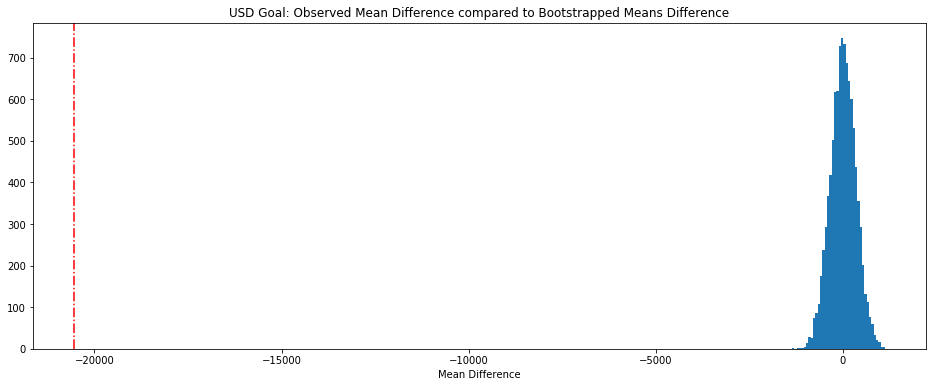

In [76]:
fig, ax = plt.subplots(figsize = (16, 6))

ax = plt.hist(bs_mean_diff, bins = 40)
plt.axvline(mean_diff, color = 'r', linestyle = '-.')
plt.title('USD Goal: Observed Mean Difference compared to Bootstrapped Means Difference')
plt.xlabel('Mean Difference')

## fig.savefig("img/bootstrap_mean_difference_usd_goal", bbox_inches='tight')

In [63]:
mean_diff

-72630.1590209634

## Description Length Analysis

In [21]:
df.description_len
print(np.mean(df.description_len))

3188.2674521354934


In [22]:
s_d_len = reached_goal[(reached_goal.description_len <= 40000)].description_len.dropna()
f_d_len = missed_goal[(missed_goal.description_len <= 40000)].description_len.dropna()

In [23]:
print(np.mean(s_d_len))
print(np.mean(f_d_len))

3773.047972449599
2434.0312744226158


In [24]:
N_rep = 10000

bs_sdlen = draw_bs_reps(s_d_len, np.mean, N_rep)
bs_fdlen = draw_bs_reps(f_d_len, np.mean, N_rep)

sd_low, sd_high = np.percentile(bs_sdlen, [2.5, 97.5])
fd_low, fd_high = np.percentile(bs_fdlen, [2.5, 97.5])

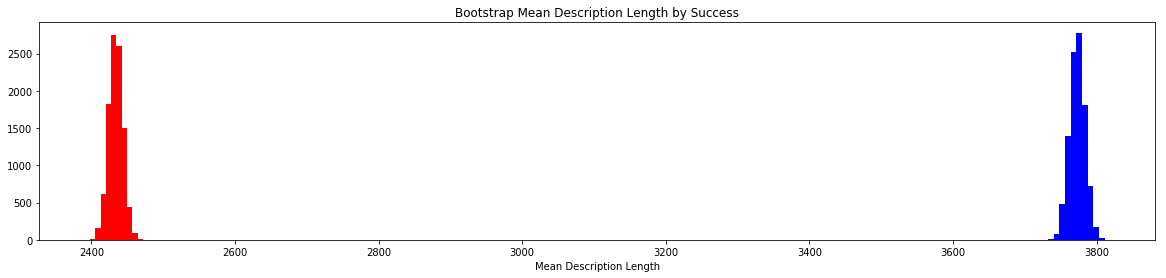

In [28]:
fig, ax = plt.subplots(figsize = (20, 4))
ax = plt.hist(bs_sdlen, color = 'b')
ax = plt.hist(bs_fdlen, color = 'r')

plt.title('Bootstrap Mean Description Length by Success')
plt.xlabel('Mean Description Length')
plt.show()
fig.savefig("img/bootstrap_mean_description_length", bbox_inches='tight')

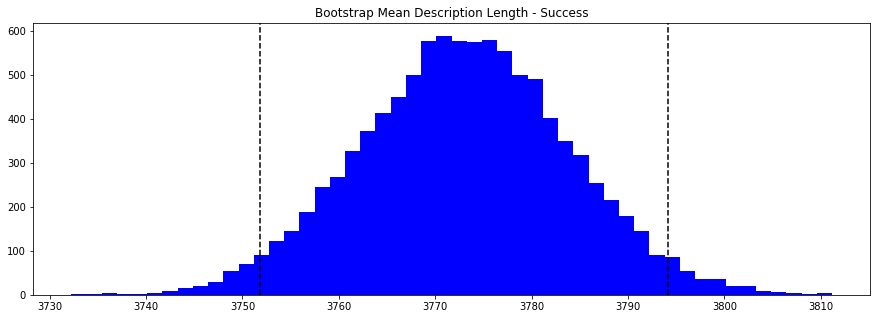

42.29523441915944


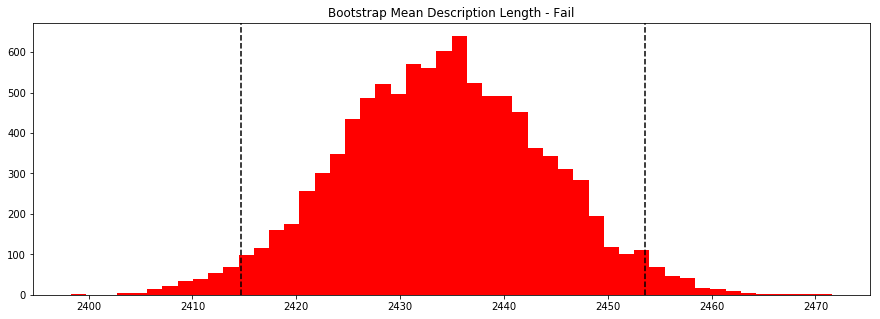

38.92008583286133


In [30]:
fig, ax = plt.subplots(figsize = (15, 5))
ax = plt.hist(bs_sdlen, color = 'b', bins = 50)
plt.axvline(sd_low, color = 'k', linestyle = '--')
plt.axvline(sd_high, color = 'k', linestyle = '--')
plt.title('Bootstrap Mean Description Length - Success')
plt.show()

fig.savefig("img/bootstrap_mean_description_len_success", bbox_inches='tight')
print(sd_high - sd_low)

fig, ax = plt.subplots(figsize = (15, 5))
ax = plt.hist(bs_fdlen, color = 'r', bins = 50)
plt.axvline(fd_low, color = 'k', linestyle = '--')
plt.axvline(fd_high, color = 'k', linestyle = '--')
plt.title('Bootstrap Mean Description Length - Fail')
plt.show()

fig.savefig("img/bootstrap_mean_description_len_fail", bbox_inches='tight')
print(fd_high - fd_low)

In [31]:
print(np.max(bs_sdlen) - np.min(bs_sdlen))
print(np.max(bs_fdlen) - np.min(bs_fdlen))

78.94384198295893
73.27574312124398


## Median Rewards Analysis

In [32]:
df.columns

Index(['blurb', 'country', 'created_at', 'currency', 'deadline', 'launched_at',
       'slug', 'spotlight', 'staff_pick', 'state', 'usd_pledged',
       'category_name', 'location_displayable_name', 'location_country',
       'location_state', 'web_url', 'description', 'img_count', 'vid_count',
       'category_core', 'usd_goal', 'percent_goal', 'vid_usage', 'reach_goal',
       'usd_rewards', 'description_len', 'blurb_len', 'slug_len',
       'med_rewards', 'reward_len'],
      dtype='object')

In [33]:
reached_goal.med_rewards.describe()

count    95529.000000
mean        95.995209
std        157.679686
min          0.000000
25%         35.000000
50%         60.000000
75%        100.000000
max       9000.000000
Name: med_rewards, dtype: float64

In [34]:
missed_goal.med_rewards.describe()

count    74205.000000
mean       167.067784
std        599.919409
min          0.000000
25%         25.000000
50%         50.000000
75%        101.000000
max      11201.630000
Name: med_rewards, dtype: float64

In [35]:
s_med_r = reached_goal.med_rewards.dropna()
f_med_r = missed_goal.med_rewards.dropna()
print(np.mean(s_med_r))
print(np.mean(f_med_r))

95.9952089417878
167.06778397682018


In [36]:
N_rep = 10000

bs_smedr = draw_bs_reps(s_med_r, np.mean, N_rep)
bs_fmedr = draw_bs_reps(f_med_r, np.mean, N_rep)

smr_low, smr_high = np.percentile(bs_smedr, [2.5, 97.5])
fmr_low, fmr_high = np.percentile(bs_fmedr, [2.5, 97.5])

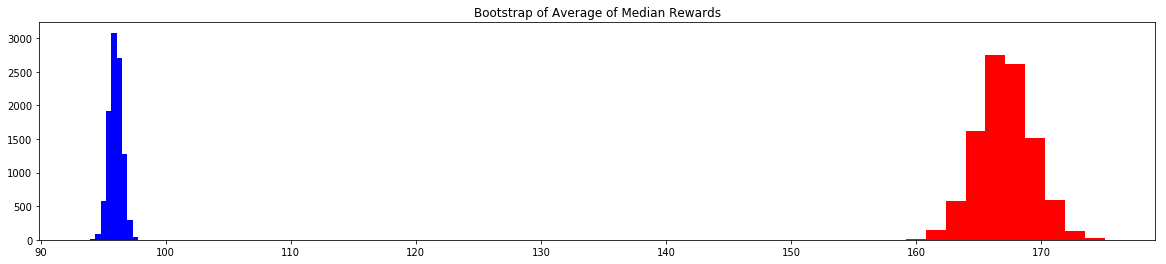

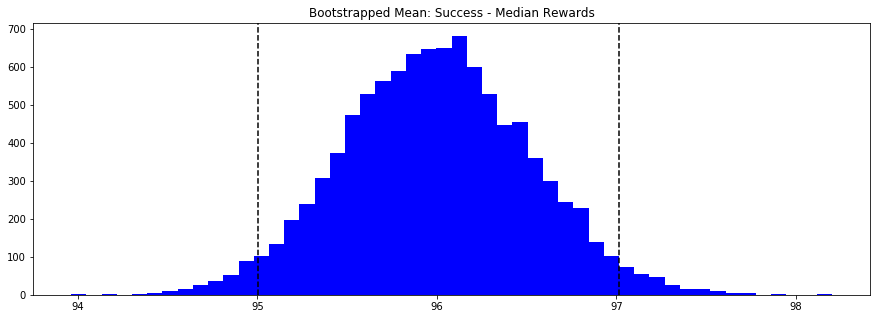

95%CI range for success:  2.010426053868457


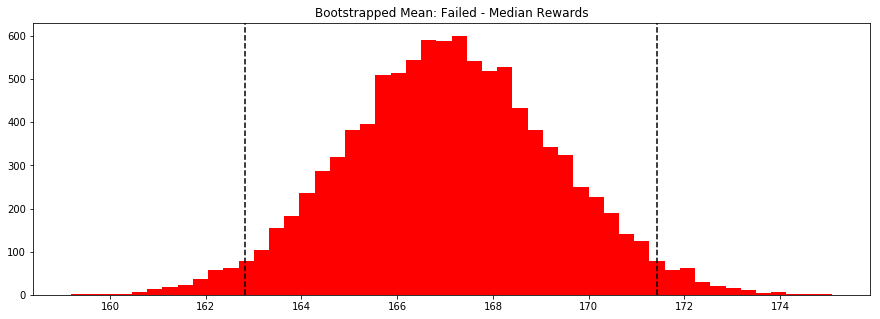

95%CI range for failed:  8.602564662084774


In [38]:
fig, ax = plt.subplots(figsize = (20, 4))
ax = plt.hist(bs_smedr, color = 'b')
ax = plt.hist(bs_fmedr, color = 'r')
plt.title('Bootstrap of Average of Median Rewards')
plt.show()
fig.savefig("img/bootstrap_median_rewards", bbox_inches='tight')

fig, ax = plt.subplots(figsize = (15, 5))
ax = plt.hist(bs_smedr, color = 'b', bins = 50)
plt.axvline(smr_low, color = 'k', linestyle = '--')
plt.axvline(smr_high, color = 'k', linestyle = '--')
plt.title('Bootstrapped Mean: Success - Median Rewards')
plt.show()
fig.savefig("img/bootstrap_median_rewards_success", bbox_inches='tight')
print("95%CI range for success: ", smr_high - smr_low)

fig, ax = plt.subplots(figsize = (15, 5))
ax = plt.hist(bs_fmedr, color = 'r', bins = 50)
plt.axvline(fmr_low, color = 'k', linestyle = '--')
plt.axvline(fmr_high, color = 'k', linestyle = '--')
plt.title('Bootstrapped Mean: Failed - Median Rewards')
plt.show()
fig.savefig("img/bootstrap_median_rewards_fail", bbox_inches='tight')
print("95%CI range for failed: ",fmr_high - fmr_low)

## Category Success

In [39]:
df.groupby(by='category_core').reach_goal.mean().sort_values()
## Same as % total success since it's sum of all 1s over total. 

category_core
food            0.296531
journalism      0.314895
technology      0.364666
photography     0.412310
crafts          0.424502
art             0.579940
fashion         0.584753
film & video    0.585289
games           0.617355
design          0.617842
theater         0.645216
music           0.673374
publishing      0.702714
dance           0.791487
comics          0.794365
Name: reach_goal, dtype: float64

In [40]:
def success_rate(data):
    return np.sum(data) / len(data)

In [41]:
categories = list(df.category_core.unique())

In [42]:
## Getting categories into individual fields
cc_analysis = dict()

for i, cc in enumerate(categories):
    cc_analysis[cc] = df[df.category_core == cc].reach_goal
    
## Running bootstrap
bscc_analysis = dict()

N_rep = 1000
for c in cc_analysis:
    bscc_analysis[c] = draw_bs_reps(cc_analysis[c], success_rate, N_rep)


In [43]:
colors = ['#e6194B', '#3cb44b', '#ffe119',
'#4363d8', '#f58231', '#911eb4', 
'#42d4f4', '#f032e6', '#bfef45', 
'#fabebe', '#469990', '#e6beff', 
'#9A6324', '#fffac8', '#800000']
cat_color = dict(zip(categories, colors))

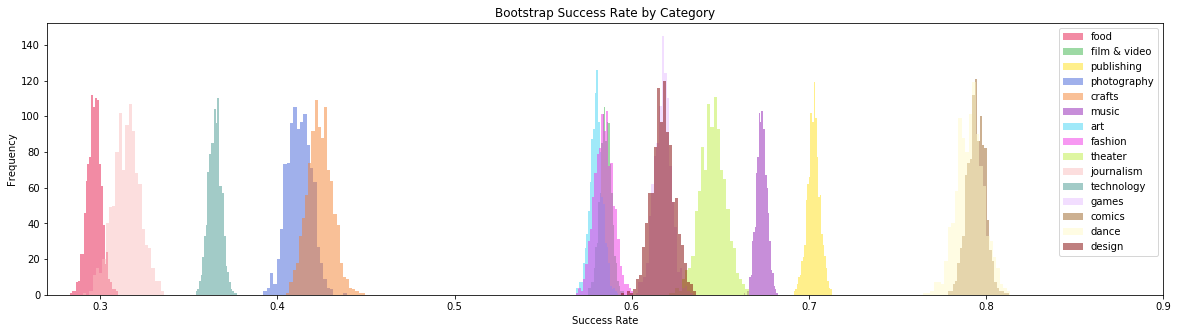

In [44]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.set_xlim(.27, .9)


for bs in bscc_analysis:
    ax = plt.hist(bscc_analysis[bs], alpha = 0.5, bins = 25, label = bs, color = cat_color[bs])

plt.title("Bootstrap Success Rate by Category")
plt.xlabel('Success Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_success_rate_by_category", bbox_inches='tight')

In [45]:
low_half = df.groupby(by='category_core').reach_goal.mean().sort_values().values<.5
low_half_list = list(df.groupby(by='category_core').reach_goal.mean().sort_values()[low_half].index)
high_half = df.groupby(by='category_core').reach_goal.mean().sort_values().values>=.5
high_half_list = list(df.groupby(by='category_core').reach_goal.mean().sort_values()[high_half].index)

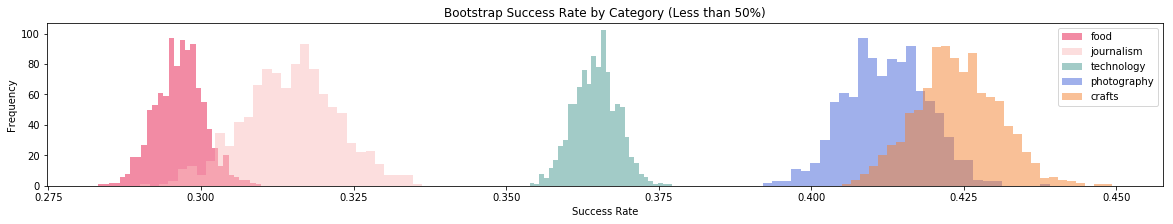

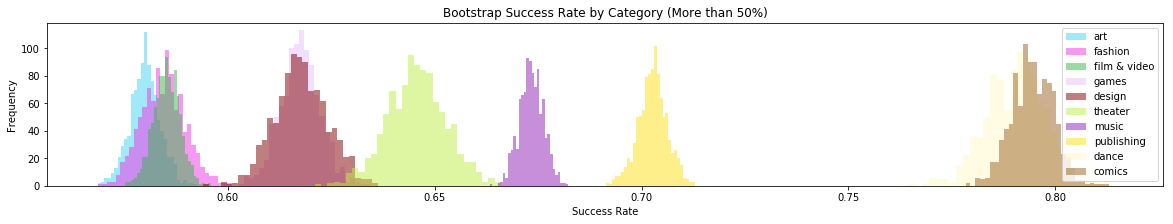

In [46]:
fig, ax = plt.subplots(figsize = (20, 3))
for bs in low_half_list:
    ax = plt.hist(bscc_analysis[bs], alpha = 0.5, bins = 30, label = bs, color = cat_color[bs])
plt.title("Bootstrap Success Rate by Category (Less than 50%)")
plt.xlabel('Success Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_success_rate_category_lower", bbox_inches='tight')

fig, ax = plt.subplots(figsize = (20, 3))
for bs in high_half_list:
    ax = plt.hist(bscc_analysis[bs], alpha = 0.5, bins = 30, label = bs, color = cat_color[bs])
plt.title("Bootstrap Success Rate by Category (More than 50%)")
plt.xlabel('Success Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_success_rate_category_high", bbox_inches='tight')

In [49]:
high = 0
highest = ''
low = 100
lowest = ''

for bs in bscc_analysis:
    conf_test = np.percentile(bscc_analysis[bs], 100) - np.percentile(bscc_analysis[bs], 0)
    if conf_test > high:
        high = conf_test
        highest = bs
    if conf_test < low:
        low = conf_test
        lowest = bs
print("The highest spread in a category category is {} with {}".format(highest, high))
print("The lowest spread in a category is {} with {}".format(lowest, low))

The highest spread in a category category is dance with 0.049218490189557706
The lowest spread in a category is music with 0.019027141060489194


## Video Usage

In [51]:
## Getting categories into individual fields
vu_analysis = dict()

for i, vu in enumerate(categories):
    vu_analysis[vu] = df[df.category_core == vu].vid_usage
    
## Running bootstrap
bsvu_analysis = dict()

N_rep = 1000
for c in vu_analysis:
    bsvu_analysis[c] = draw_bs_reps(vu_analysis[c], success_rate, N_rep)

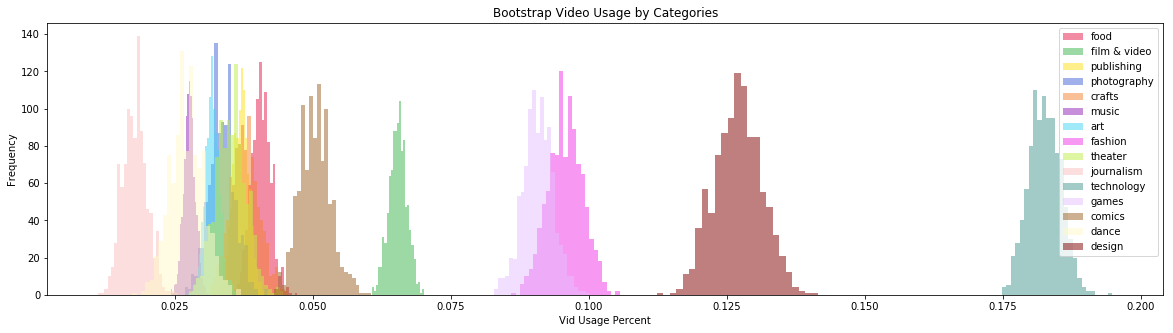

In [52]:
fig, ax = plt.subplots(figsize = (20, 5))

for bs in bsvu_analysis:
    ax = plt.hist(bsvu_analysis[bs], alpha = 0.5, bins = 25, label = bs, color = cat_color[bs])

plt.title("Bootstrap Video Usage by Categories")
plt.xlabel('Vid Usage Percent')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_video_usage", bbox_inches='tight')

## Categories to USD Goal

In [53]:
from scipy.stats import ttest_ind


usd_analysis = dict()

for i, c in enumerate(categories):
    usd_analysis[c] = df[df.category_core == c].usd_goal


In [54]:
yeet = pd.DataFrame(columns=['cat_a','cat_b','t','p'])
for a in range(15):
    cat_a = categories[a]
    for b in range(15):
        cat_b = categories[b]
        sci_t_test = ttest_ind(usd_analysis[cat_a], usd_analysis[cat_b], equal_var = False)
        stats = dict({'cat_a':cat_a, 'cat_b':cat_b,'t':np.abs(sci_t_test[0]),'p':sci_t_test[1]})
        yeet = yeet.append(stats, ignore_index = True)

In [55]:
yeetplus = yeet.pivot('cat_a', 'cat_b', 'p')

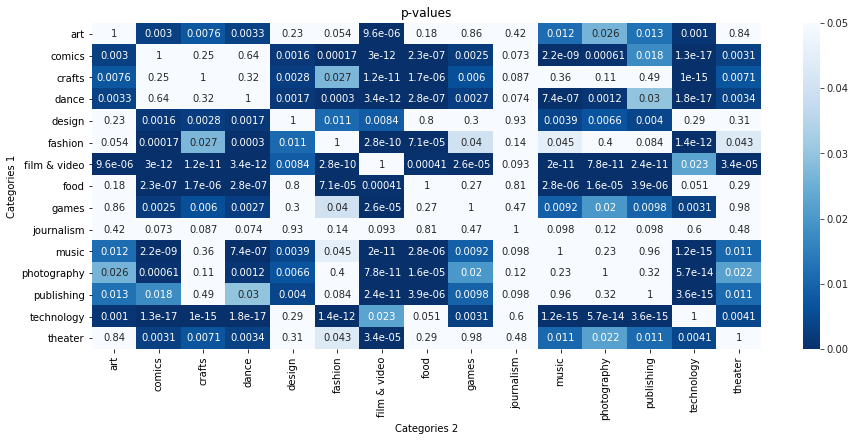

In [56]:
fig, ax = plt.subplots(figsize = (15, 6))

mask = np.zeros_like(yeetplus)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(yeetplus,vmax = .05,annot=True, cmap = "Blues_r")
plt.title("p-values")
plt.ylabel("Categories 1")
plt.xlabel("Categories 2")

plt.show()
fig.savefig("img/p_value_category_usd_goal", bbox_inches='tight')
##corr = np.corrcoef(np.random.randn(10, 200))
##mask = np.zeros_like(corr)
##mask[np.triu_indices_from(mask)] = True
##with sns.axes_style("white"):
##     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

For deep blue values that are well below the %5 threshold, we are more likely to reject the null hypothesis that the average usd goal between categories are equal.    
This tells us that when we're comparing goals between success and failure, it isn't enough to just take the group of success and failure as a whole and would need to compare between categories too.

## Months

In [57]:
df['created_at_month'] = df.created_at.dt.strftime('%B')
df.groupby(by='created_at_month').reach_goal.mean().sort_values()

created_at_month
July         0.502409
December     0.549281
June         0.552649
November     0.553224
August       0.553316
April        0.569419
October      0.570924
September    0.570944
May          0.573774
January      0.581404
February     0.582311
March        0.592981
Name: reach_goal, dtype: float64

In [58]:
df['deadline_month'] = df.deadline.dt.strftime('%B')
df.groupby(by='deadline_month').reach_goal.mean().sort_values()

deadline_month
January      0.521900
August       0.525653
September    0.530028
February     0.559056
December     0.561119
June         0.564398
July         0.564689
October      0.571588
May          0.574565
November     0.582891
March        0.585760
April        0.595784
Name: reach_goal, dtype: float64

In [59]:
df['ct_dt_month'] = df.created_at.dt.strftime('%B') + ' - ' + df.deadline.dt.strftime('%B')

ct_dt_group = df.groupby(by='ct_dt_month').reach_goal

ct_dt_group.mean().sort_values()[
    ct_dt_group.count().sort_values() > 1000
]

ct_dt_month
July - August           0.460282
December - January      0.490043
July - September        0.502878
June - July             0.508511
August - September      0.511682
October - January       0.517647
November - December     0.520298
May - June              0.524841
April - May             0.531324
January - February      0.532485
September - October     0.534270
November - January      0.543415
February - March        0.545440
October - November      0.550875
December - February     0.563819
March - April           0.565204
August - October        0.569469
April - June            0.570525
June - August           0.571357
October - December      0.575509
January - March         0.588062
September - November    0.589709
July - October          0.597812
March - May             0.598463
November - February     0.599340
February - April        0.599427
June - September        0.599664
May - July              0.601574
September - December    0.612769
August - November       0.62359

In [60]:
## Getting categories into individual fields
create_month_analysis = dict()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December']

for m in months:
    create_month_analysis[m] = df[df.created_at_month == m].reach_goal
    
## Running bootstrap
bscm_analysis = dict()

N_rep = 1000
for c in create_month_analysis:
    bscm_analysis[c] = draw_bs_reps(create_month_analysis[c], success_rate, N_rep)

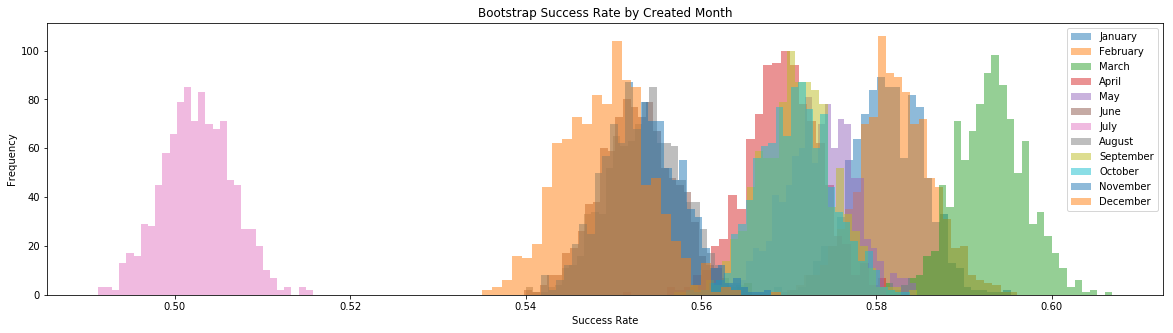

In [61]:
fig, ax = plt.subplots(figsize = (20, 5))

for bs in bscm_analysis:
    ax = plt.hist(bscm_analysis[bs], alpha = 0.5, bins = 30, label = bs)

plt.title("Bootstrap Success Rate by Created Month")
plt.xlabel('Success Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_success_rate_by_created_month", bbox_inches='tight')

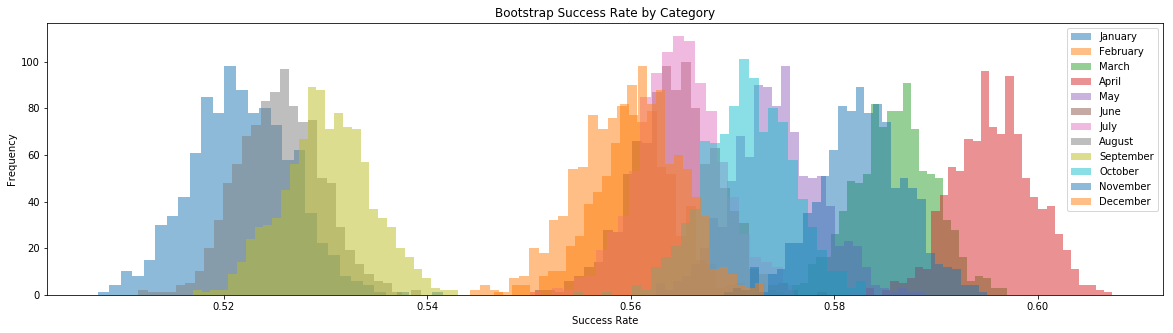

In [62]:
## Getting categories into individual fields
deadline_analysis = dict()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December']

for m in months:
    deadline_analysis[m] = df[df.deadline_month == m].reach_goal
    
## Running bootstrap
bsd_analysis = dict()

N_rep = 1000
for c in deadline_analysis:
    bsd_analysis[c] = draw_bs_reps(deadline_analysis[c], success_rate, N_rep)
    
fig, ax = plt.subplots(figsize = (20, 5))

for bs in bsd_analysis:
    ax = plt.hist(bsd_analysis[bs], alpha = 0.5, bins = 30, label = bs)

plt.title("Bootstrap Success Rate by Category")
plt.xlabel('Success Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig("img/bootstrap_sr_category_month", bbox_inches='tight')